### **Applying the concept of Outlier detection by using Z-score Detection and Outlier treatment both by Capping and Trimming**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/placement.csv')

In [4]:
data.shape

(1000, 3)

In [5]:
data.sample(6)

,cgpa,placement_exam_marks,placed
797,8.14,20.0,1
750,6.43,8.0,1
176,7.72,30.0,1
988,5.64,37.0,1
641,7.49,22.0,0
434,7.01,5.0,0


#### **Checking whether the distribution is Normal or not as Z-score is only applied on Normal pdf**

<ipython-input-8-956f81b59e38>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['cgpa'], hist=False)
<ipython-input-8-956f81b59e38>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['placement_exam_marks'], hist=False)


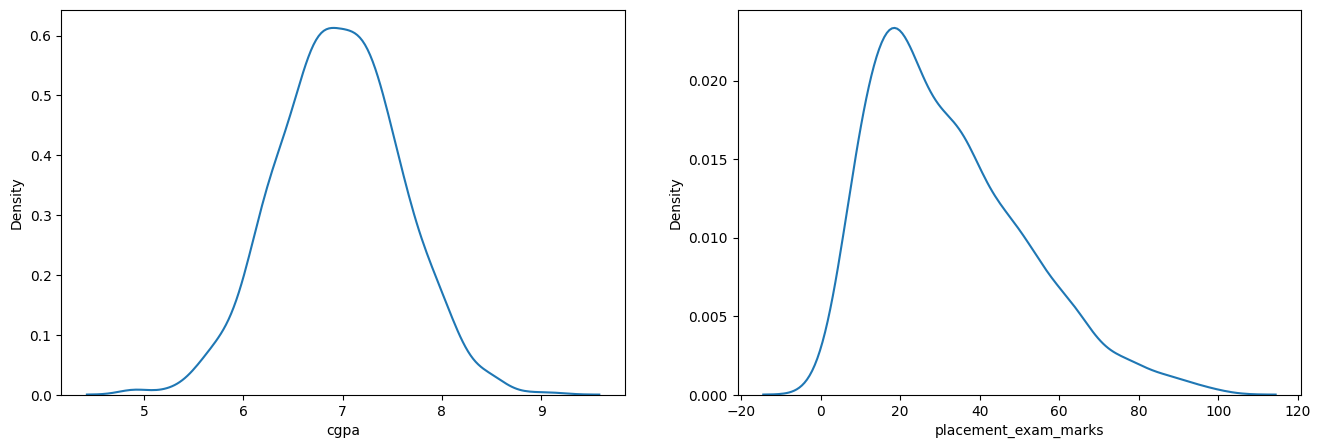

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['cgpa'], hist=False)

plt.subplot(1,2,2)
sns.distplot(data['placement_exam_marks'], hist=False)

plt.show()
#As cgpa is Normally distributed so we can apply Z-score on it but not on placement_exam_marks

In [9]:
data['placement_exam_marks'].skew()

0.8356419499466834

In [11]:
print("Mean value of cgpa",data['cgpa'].mean())
print("Std value of cgpa",data['cgpa'].std())
print("Min value of cgpa",data['cgpa'].min())
print("Max value of cgpa",data['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [13]:
data['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

#### **Finding the Boundary values(max & min)**

In [16]:
print("Highest allowed",data['cgpa'].mean() + 3*data['cgpa'].std())
print("Lowest allowed",data['cgpa'].mean() - 3*data['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


#### **Finding the Outliers**

In [18]:
data[(data['cgpa'] > 8.80) | (data['cgpa'] < 5.11)]
#The following data is about the outliers

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### **Applying Outliers Treatment**

#### **1.Trimming**

In [19]:
new_data = data[(data['cgpa'] < 8.80) & (data['cgpa'] > 5.11)]
new_data

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [22]:
# Approach 2

# Calculating the Zscore

data['cgpa_zscore'] = (data['cgpa'] - data['cgpa'].mean())/data['cgpa'].std()
data['cgpa_zscore']

0      0.371425
1      0.809810
2      0.939701
3     -0.878782
4      0.436371
         ...   
995    3.099150
996    3.505062
997   -3.362960
998    2.693239
999   -3.346724
Name: cgpa_zscore, Length: 1000, dtype: float64

In [23]:
data[data['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [24]:
data[data['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [25]:
data[(data['cgpa_zscore'] > 3) | (data['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [26]:
# Trimming
new_df = data[(data['cgpa_zscore'] < 3) & (data['cgpa_zscore'] > -3)]

In [27]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


#### **2.Capping**

In [29]:
upper_limit = data['cgpa'].mean() + 3*data['cgpa'].std()
lower_limit = data['cgpa'].mean() - 3*data['cgpa'].std()

In [30]:
data['cgpa'] = np.where(
    data['cgpa']>upper_limit,
    upper_limit,
    np.where(
        data['cgpa']<lower_limit,
        lower_limit,
        data['cgpa']
    )
)

In [31]:
data.shape

(1000, 4)

In [32]:
data['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64